In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#import warnings
#warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/corona.csv')

In [ ]:
df.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


Data Preprocessing

In [ ]:
# function to convert the data

def convert(x):
    if x=='TRUE':
        return 'true'
    elif x==True:
        return 'true'
    elif x=='FALSE' or x==False:
        return 'false'
    else:
        return x

In [ ]:
# mapping the function

df['Cough_symptoms'] = df['Cough_symptoms'].map(convert)
df['Fever'] = df['Fever'].map(convert)
df['Sore_throat'] = df['Sore_throat'].map(convert)
df['Shortness_of_breath'] = df['Shortness_of_breath'].map(convert)
df['Headache'] = df['Headache'].map(convert)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [ ]:
# replacing the none values with Nan values

df.replace({'None': np.nan}, inplace=True)

In [ ]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [ ]:
# Dropping the nan values from columns

df.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'],axis=0,inplace=True)

In [ ]:
# dropping the age_60_above column

df.drop('Age_60_above',axis=1,inplace=True)

In [ ]:
# # replacing the none values with Nan values

df.replace({'other': np.nan},inplace=True)

In [ ]:
# Dropping the nan values from columns

df.dropna(subset=['Corona'],axis=0,inplace=True)

In [ ]:
# converting the datatype as categorical

for i in df.columns:
    if i=='Ind_ID' or i == 'Test_date':
        pass
    else:
        df[i] = df[i].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  255668 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(8), int64(1), object(1)
memory usage: 8.4+ MB


Explorartory Data Analysis

In [ ]:
sns.set_style('dark')

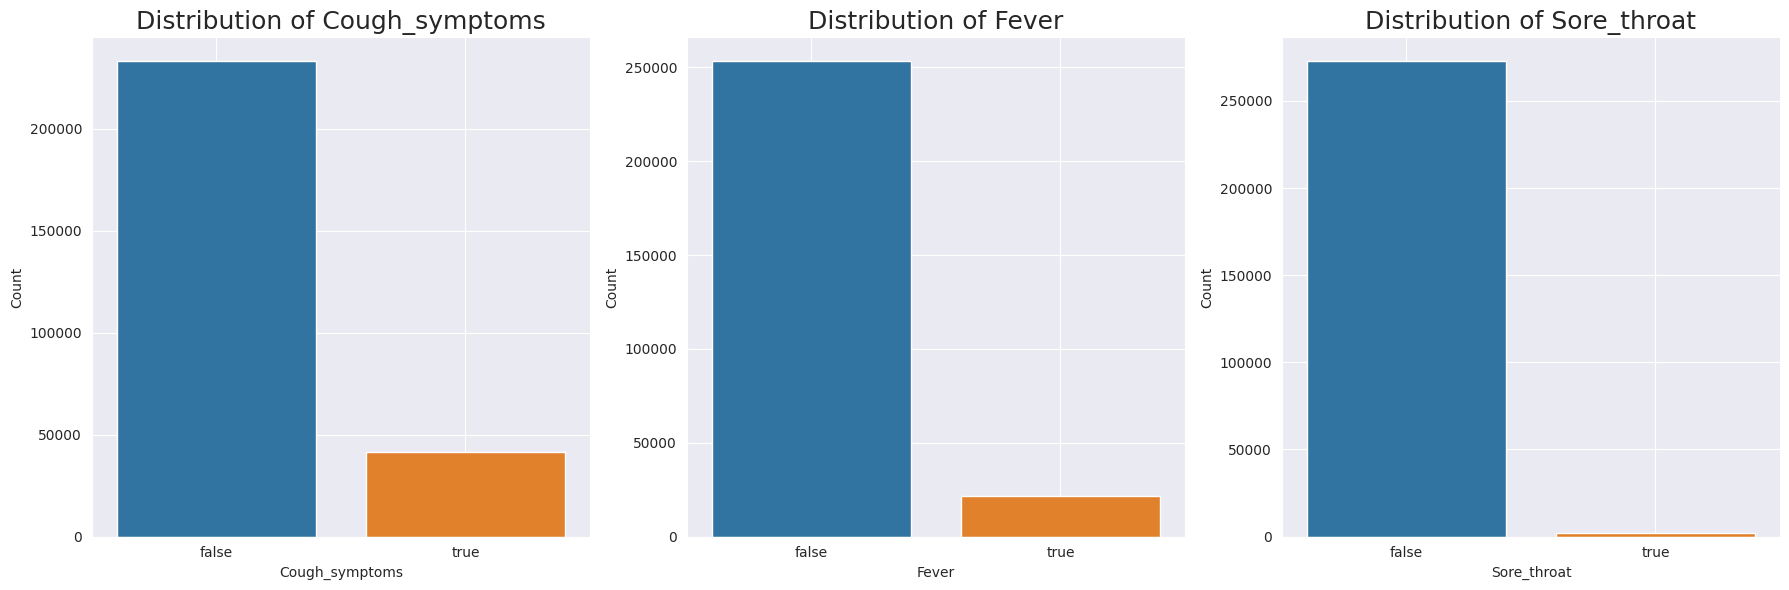

In [ ]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

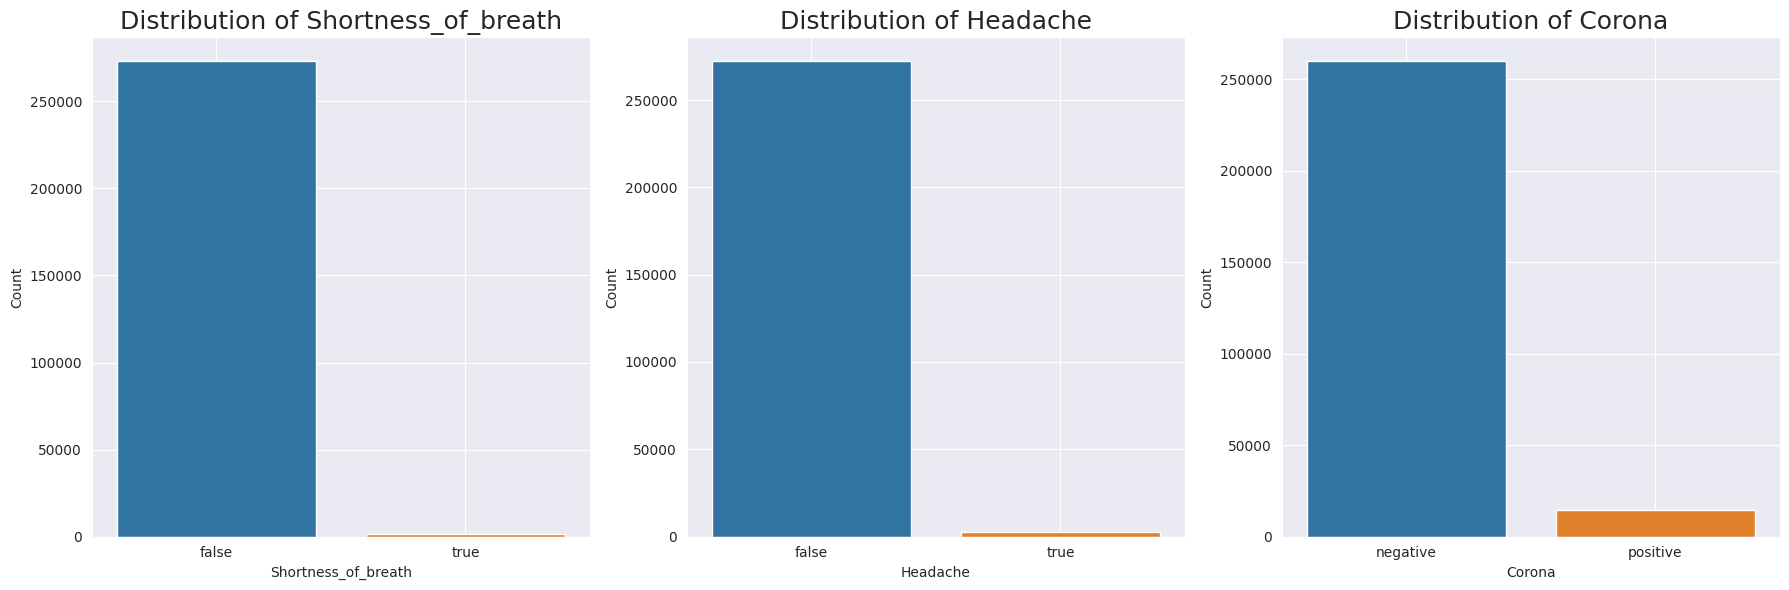

In [ ]:
cols = ['Shortness_of_breath','Headache',	'Corona']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

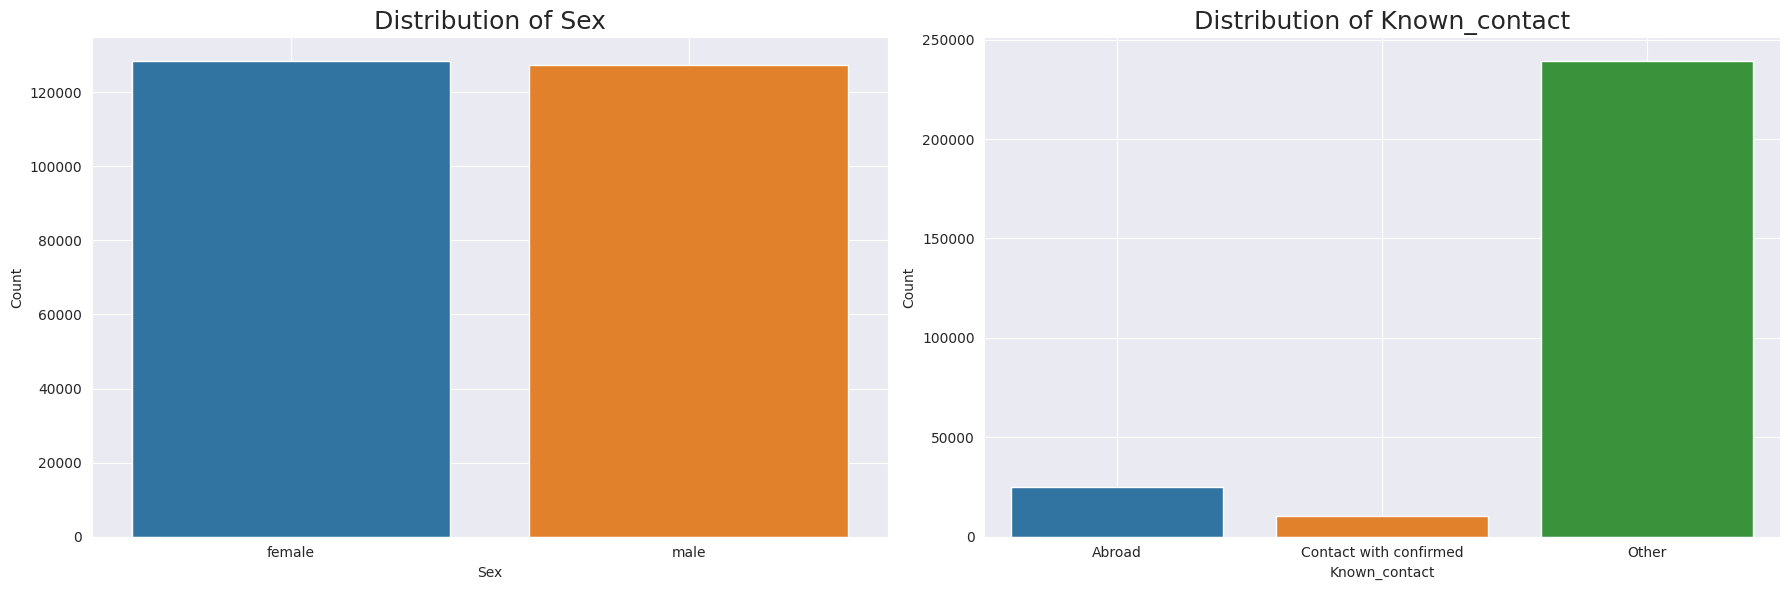

In [ ]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

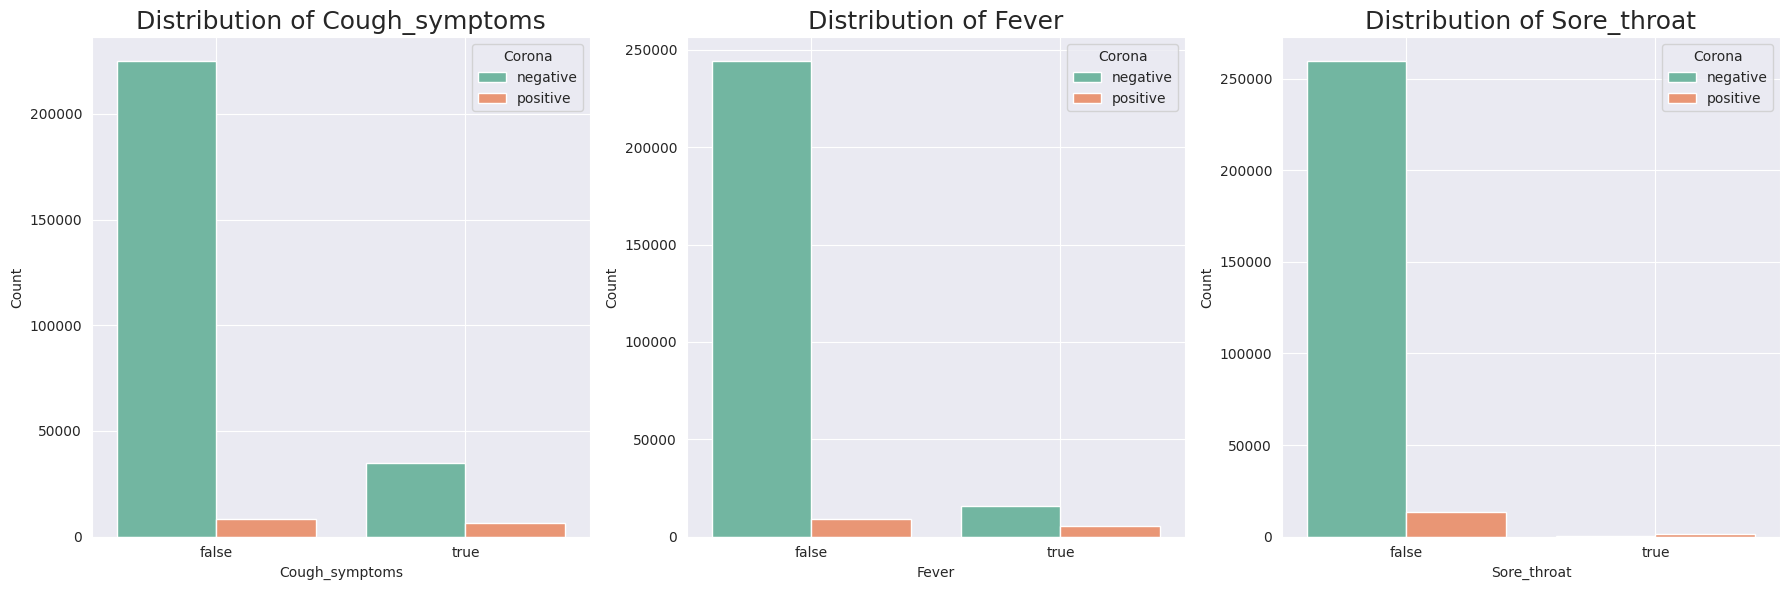

In [ ]:
cols = ['Cough_symptoms', 'Fever', 'Sore_throat']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

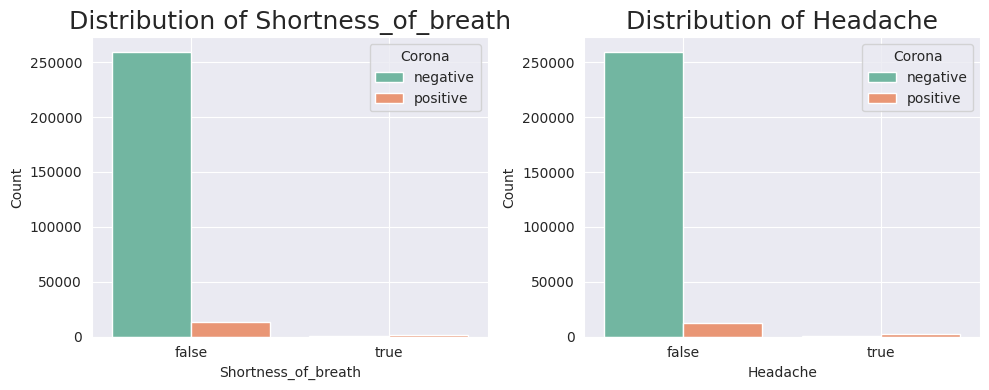

In [ ]:
cols = ['Shortness_of_breath','Headache']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=18 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

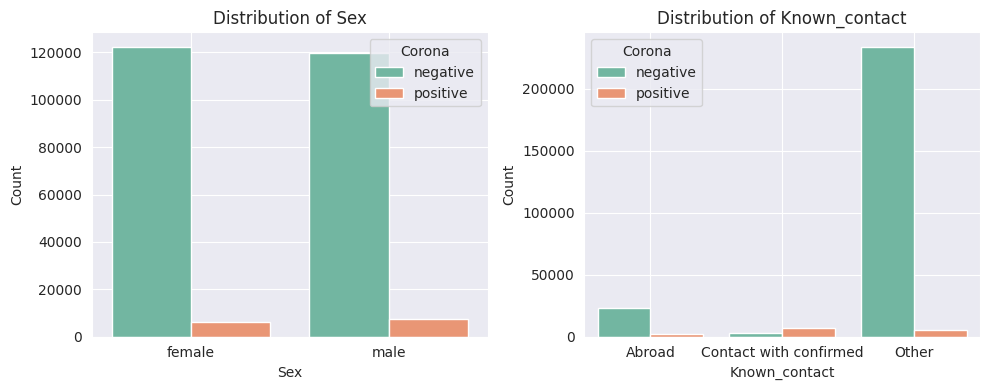

In [ ]:
cols = ['Sex',	'Known_contact']

# Set up the figure and axes

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.countplot(data=df , x=col,hue='Corona', ax=axes[i]  , palette="Set2")
    axes[i].set_title(f'Distribution of {col}' , fontsize=12 )
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Feature Transformation

In [ ]:
# creating a copy of original dataframe

covid_df = df.copy(deep=True)

In [ ]:
# Encoding

covid_df['Cough_symptoms'] = pd.get_dummies(covid_df['Cough_symptoms'],drop_first=True)  # to aviod multicolinearity

covid_df['Fever'] = pd.get_dummies(covid_df['Fever'],drop_first=True)

covid_df['Sore_throat'] = pd.get_dummies(covid_df['Sore_throat'],drop_first=True)

covid_df['Shortness_of_breath'] = pd.get_dummies(covid_df['Shortness_of_breath'],drop_first=True)

covid_df['Headache'] = pd.get_dummies(covid_df['Headache'],drop_first=True)

covid_df['Corona'] = pd.get_dummies(covid_df['Corona'],drop_first=True)

In [ ]:
# encoding

covid_df['Sex'].replace({'male':0,'female':1},inplace=True)
covid_df['Known_contact'].replace({'Other':2,'Contact with confirmed':1,'Abroad':0},inplace=True)

In [ ]:
covid_df.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,NaN,0
1,2,11-03-2020,0,1,0,0,0,1,NaN,0
2,3,11-03-2020,0,1,0,0,0,1,NaN,0
3,4,11-03-2020,1,0,0,0,0,0,NaN,0
4,5,11-03-2020,1,0,0,0,0,0,NaN,1


In [ ]:
covid_df.isnull().sum()

Ind_ID                     0
Test_date                  0
Cough_symptoms             0
Fever                      0
Sore_throat                0
Shortness_of_breath        0
Headache                   0
Corona                     0
Sex                    19034
Known_contact              0
dtype: int64

Missing Value Impuatation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
# creating a copy of original dataframe

imputed_data = covid_df.copy(deep=True)

In [ ]:
# applying KNN imputation

knn=KNNImputer(n_neighbors=5,weights='uniform')
columns=['Cough_symptoms', 'Fever', 'Sore_throat','Shortness_of_breath', 'Headache','Sex','Known_contact']
imputed=knn.fit_transform(covid_df[columns])

In [ ]:
df1 = pd.DataFrame(imputed,columns=columns)

In [ ]:
def change(x):
    if x>0.5:
        return 1
    elif x<0.5:
        return 0
    else:
        return x

In [ ]:
df1['Sex'] = df1['Sex'].apply(change)

In [ ]:
imputed_data['Sex'].iloc[:] =df1['Sex']

In [ ]:
imputed_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
0,1,11-03-2020,1,0,1,0,0,0,0,0
1,2,11-03-2020,0,1,0,0,0,1,0,0
2,3,11-03-2020,0,1,0,0,0,1,0,0
3,4,11-03-2020,1,0,0,0,0,0,0,0
4,5,11-03-2020,1,0,0,0,0,0,0,1


In [ ]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  int64   
 1   Test_date            274702 non-null  object  
 2   Cough_symptoms       274702 non-null  uint8   
 3   Fever                274702 non-null  uint8   
 4   Sore_throat          274702 non-null  uint8   
 5   Shortness_of_breath  274702 non-null  uint8   
 6   Headache             274702 non-null  uint8   
 7   Corona               274702 non-null  uint8   
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(2), int64(1), object(1), uint8(6)
memory usage: 8.4+ MB


In [ ]:
imputed_data['Sex'] = imputed_data['Sex'].astype('uint8')

In [ ]:
# strong teh data in final df

final_data = imputed_data.astype('category')

In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Ind_ID               274702 non-null  category
 1   Test_date            274702 non-null  category
 2   Cough_symptoms       274702 non-null  category
 3   Fever                274702 non-null  category
 4   Sore_throat          274702 non-null  category
 5   Shortness_of_breath  274702 non-null  category
 6   Headache             274702 non-null  category
 7   Corona               274702 non-null  category
 8   Sex                  274702 non-null  category
 9   Known_contact        274702 non-null  category
dtypes: category(10)
memory usage: 15.7 MB


Feature Engineering

In [ ]:
# separating features and target variable

features = final_data.drop(['Ind_ID','Test_date','Corona'],axis=1)

target = final_data['Corona']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# chi square method to select important k best features

selector = SelectKBest(score_func=chi2, k=6)

X_new = selector.fit_transform(features, target)

idxs_selected = selector.get_support(indices=True)

feat_names = features.columns[idxs_selected]

feat_names

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Known_contact'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

# splitting train test set

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [ ]:
y_test.value_counts()

0    78054
1     4357
Name: Corona, dtype: int64

In [ ]:
y_train.value_counts()

0    181954
1     10337
Name: Corona, dtype: int64

Model Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, recall_score,precision_score,f1_score,roc_curve, auc, confusion_matrix

Random Forest

In [ ]:
# random forest

rf = RandomForestClassifier()

rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Making predictions using the Random Forest model
pred_rf = rf.predict(x_test)

# accuracy
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy:", accuracy_rf*100)

# precision
precision_rf = precision_score(y_test, pred_rf)
print("Precision:", precision_rf*100)

# recall
recall_rf = recall_score(y_test, pred_rf)
print("Recall:", recall_rf*100)

#  F1 score
f1_rf = f1_score(y_test, pred_rf)
print("F1 Score:", f1_rf*100)

Accuracy: 96.75892781303467
Precision: 75.02969121140143
Recall: 57.99862290566904
F1 Score: 65.42394822006473


Hyper Parameter Tuning

In [ ]:
rfc = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15, 20, None],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}


scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(rfc, param_grid, scoring=scorer)
grid_fit = grid_obj.fit(x_train, y_train)

In [ ]:
# Get the best hyperparameters

best_params = grid_fit.best_params_
best_params

In [ ]:
# Training the model using the best hyperparameters

rfc_best = RandomForestClassifier(random_state=42, **best_params)

rfc_best.fit(x_train, y_train)

y_pred_rf = rfc_best.predict(x_test)

In [ ]:
import pickle

In [ ]:


# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rfc_best, file)


In [ ]:
# Load the model
# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file,encoding='utf-8')


In [ ]:
# Evaluate the best model

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy: {:.10f}%".format(accuracy_rf * 100.0))

In [ ]:
# confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# precision
prec_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[0][1])
print("Precision:", prec_rf)

# recall
recall_rf = cm_rf[0][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('recall :',recall_rf)

# F-1 Score
f1_rf=2*prec_rf*recall_rf/(recall_rf + prec_rf)
print("F1 Score:", f1_rf)

# False Negative Score
fnr_rf = cm_rf[1][0]*100/(cm_rf[0][0] + cm_rf[1][0])
print('False Negative rate : ',fnr_rf)

In [ ]:
# AUC ROC curve

fpr, tpr, thresholds = roc_curve(y_test, pred_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()